# Binary classification
In binary classification, the predication will be true or false (positive/negative)

## Plots

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create training data (x_train has 1 feature while x_train2 has 2 features)
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

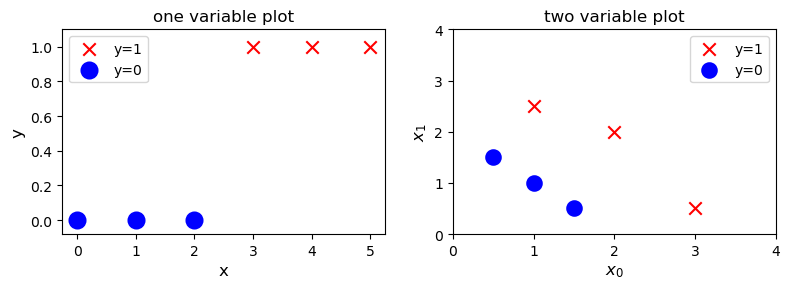

In [6]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='blue',lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False
    
#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

# Logistic regression
Logistic regression predicts the probability of an event occurring based on the data given using logistic curve

## Sigmoid function $g(z)$
$$f_{\vec{w},b}(\vec{x}^{(i)}) = g(z) = \frac{1}{1+e^{-z}}$$

where,

$$z = \vec{w} \cdot  \vec{x}^{(i)} + b$$

Model:
$$g(\vec{w} \cdot  \vec{x}^{(i)} + b) = \frac{1}{1+e^{-(\vec{w} \cdot  \vec{x}^{(i)} + b)}}$$

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png">

The sigmoid function output a value between 0 and 1 ($0 \leq g(z) \leq 1$)

The sigmoid fucntion approaches 0 for large negative $z$ values and 1 for large positive $z$ values


## Interpretation
The output of logistic regression function is the probability of a class being 1

## Decision boundary
Decision boundary decide for what predicted value will be considered positive/negative.

Based on the sigmoid function, a threshold can be when $g(z) = 0.5$. This means the prediction is 1 if $z > 0$ and 0 if $z < 0$, which is $$\vec w \cdot \vec x + b = 0$$

$\vec x$ is a vector of input features, meaning it can be feature engineering into higher order polynomial (e.g $g( x_0^2 + x_1 -1)$). This helps us to define more complex, non-linear boundaries

The decision boundary can be determined after proper weights, $\vec w$ and $b$, are selected after training

# Code

In [7]:
# Sigmoid function
def sigmoid(z):
    g = 1 / (1 + np.exp(-1 * z))
    return g

sigmoid(0)

0.5

In [8]:
# Decision boundary
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

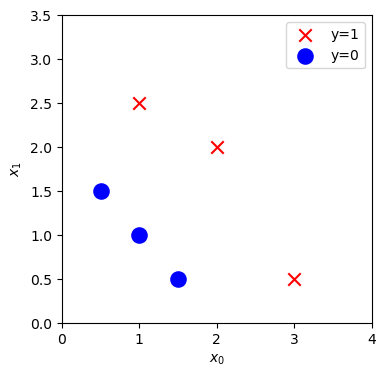

In [9]:
# Plot data
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

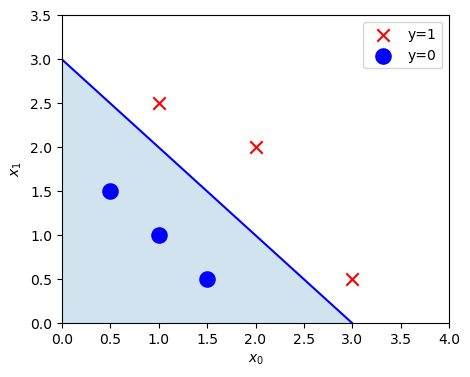

In [10]:
# Plot the decision boundary
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

# Cost function

Apply linear regression cost function to logistic regression will result in a non-convex function, which have lots of local minimum. Thus, the squared error cost function is not ideal

<img align="center" src="https://miro.medium.com/v2/resize:fit:2084/1*3o9_XoQP4TaceYPRZVHlxg.png" width=500>

## Loss
Loss is the cost of a single training exmaple

$$Loss = L(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}$$

*  $f_{\vec{w},b}(\vec{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\vec{w},b}(\vec{x}^{(i)}) = g(\vec{w} \cdot\vec{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

This model use 2 different curves to seperate the case when the actual value is 0 and 1

<img src = "https://ml-explained.com/_ipx/sizes_xs:320px%20md:768px%20lg:1024px,w_1536,f_png/articles/logistic-regression-explained/loss_functions.png">

For this model, the further the predicted value (between 0 and 1) is from the actual value (0 or 1), the larger the loss (cost for this training example)

Combine the 2 cases:
    $$L(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) = (-y^{(i)}) \log\left(f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right)$$
    
Therefore, if $y=0$, the first term becomes $0$; if $y=1$, the second term becomes 0

Cost function:

$$ J(\vec{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ L(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) \right] = -\frac{1}{m} \sum_{i=0}^{m-1} \left[ (y^{(i)}) \log\left(f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) + \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) \right]$$

where,
$$
\begin{align}
  f_{\vec{w},b}(\vec{x^{(i)}}) &= g(z^{(i)}) \\
  z^{(i)} &= \vec{w} \cdot \vec{x}^{(i)}+ b\\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}
\end{align}
$$


This cost function produce a convex curve for gradient descent to be applied

# Code

In [11]:
# Create a data set with 2 features
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

In [14]:
# Cost function
def cost(X, y, w, b):
    m = X.shape[0] # Find number of training example
    cost = 0
    
    for i in range(m):
        loss = y[i] * np.log(sigmoid(np.dot(w, X[i]) + b)) + (1 - y[i]) * np.log(1 - sigmoid(np.dot(w, X[i]) + b))
        cost += loss
        
    cost /= -m
    
    return cost

w_tmp = np.array([1,1])
b_tmp = -3
print(cost(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


# Gradient descent

Gradient descent minimum the cost

## Updating $w$ and $b$ of $j$th feature

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\vec {w},b)}{\partial w_j} \  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\vec {w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

$w$ and $b$ must update simultaneously

## Derivatives
$$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \  \\
\frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)}) \
\end{align}
$$

Note: the formla is the same as linear regression. However, for logistic regression,
* $f_{\vec{w},b}(x) = g(z) = \frac{1}{1+e^{-z}}$
* $z = \vec w \cdot \vec x + b$

Since the prediction function is different, the gradient descent function will also be different 

Vectorized implementation and feature scaling still applies

# Code

In [88]:
# Calculate gradient (this function only applies to data with multiple features, for only 1 feature, n does not' exist)
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    n = len(w)
    gw = np.zeros(n) # An array of gradients for each feature
    gb = 0
    
    for i in range(m):
        z = np.dot(w, X[i]) + b
        gb += sigmoid(z) - y[i]
        
        for j in range(n): # Compute gradient for jth feature
            y_i = X[i][j]
            a = y[i]
            gw[j] += (sigmoid(z) - a) * y_i
        
    gw /= m
    gb /= m
    
    return gw, gb

In [89]:
compute_gradient(X_train, y_train, [2., 3.], 1.)

(array([0.49833339, 0.49883943]), 0.49861806546328574)

In [90]:
# Gradient Descent
def gradient(X, y, w, b, alpha, iterations):
    
    for i in range(iterations):
        gw, gb = compute_gradient(X, y, w, b)
        w = w - alpha * gw
        b = b - alpha * gb
    
    return w, b

In [91]:
gradient(X, y, [0., 0.], 0., 0.1, 10000)

/var/folders/sr/s2xlp24j2w5fg_6tp3y9g33h0000gq/T/ipykernel_41820/2741485095.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gw[j] += (sigmoid(z) - a) * y_i


(array([5.28123029, 5.07815608]), array([-14.22240998]))

In [92]:
# Final model
def model(input_value):
    m = input_value.shape[0]
    w, b =  gradient(X, y, np.zeros(m), 0, 0.1, 10000)
    output = sigmoid(np.dot(w, input_value) + b)
    
    return output

In [93]:
# Prediction close to 0 and 1
print(model(np.array([1, 1])))
print(model(np.array([3, 3])))

/var/folders/sr/s2xlp24j2w5fg_6tp3y9g33h0000gq/T/ipykernel_41820/2741485095.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gw[j] += (sigmoid(z) - a) * y_i


[0.02057229]
[0.99999995]


# Overfitting & underfitting

Generalization: when the model provides accurate predictions to data that is not in the training set

Overfitting (high variance): when the model fits the training data too well, but does not accurate predict real world data

Underfitting (high bias): when the model does not predict the result well enough (high bias)

## Addressing overfitting
1. Collect more training data
2. Feature selection: use fewer, the most relative features (too many features with insufficient data can cause the model to overfit). However, this method also ignore some relavent information
3. Regularization: use smaller weights to prevent features having significant impact on the model

# Regularization
Regularization reduces the impact of less significant features on the model. However, it is difficult to determine which feature is important and which one is not. Thus, regularization usually penalized all features.

## Regularized cost function for linear regression
The equation for the cost function regularized linear regression is,
$$J(\vec{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$ 
where:
$$ f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b $$


$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$: regularization term for $n$ features that prevents overfitting

$\lambda$: regularization parameter ($\lambda \geq 0$)

If $\lambda$ if too larger, all features will be too small and the model will underfit. If $\lambda$ if too small, all features will be too large and the model will overfit

# Code

In [96]:
# Regularized cost function for linear regression
def reg_lin_cost(X, y, w, b, lambda_ = 1):
    m = X.shape[0]
    n = len(w)
    cost = 0
    
    # Linear regression cost
    for i in range(m):
        cost += (np.dot(X[i], w) + b - y[i])**2
    cost /= 2 * m
    
    reg_term = 0
    # Regularization term
    for j in range(n):
        reg_term += (w[j])**2
    
    reg_term = reg_term * lambda_ / (2 * m)
    
    return cost + reg_term

In [97]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = reg_lin_cost(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


# Regularized cost function for logistic regression

$$J(\vec{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ L(f_{\vec{w},b}(\vec{x}^{(i)}), y^{(i)}) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$
$$= \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\vec{w},b}\left( \vec{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$
where, $$ f_{\vec{w},b}(\vec{x}^{(i)}) = sigmoid(\vec{w} \cdot \vec{x}^{(i)} + b) $$

$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $ term is same as linear regression

# Code

In [103]:
# Regularized cost function for linear regression
def reg_log_cost(X, y, w, b, lambda_ = 1):
    m = X.shape[0]
    n = len(w)
    cost = 0
    
    # Logistic regression
    for i in range(m):
        cost += y[i] * np.log(sigmoid(np.dot(w, X[i]) + b)) + (1 - y[i]) * np.log(1 - sigmoid(np.dot(w, X[i]) + b))
        
    cost /= -m
    
    reg_term = 0
    
    # Regularization term
    for j in range(n):
        reg_term += (w[j])**2
    
    reg_term = reg_term * lambda_ / (2 * m)
    
    return cost + reg_term

In [104]:
# Test
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = reg_log_cost(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


# Regularized gradient descent

The basic gradient descent function remains the same, where
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

However, the cost function $J$ is different 

## Derivatives
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\vec{w}b}$.
$$\begin{align*}
\frac{\partial J(\vec{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec {x}^{(i)}) - y^{(i)})
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\vec{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For linear regression:
    $f_{\vec{w},b}(\vec x) = \vec{w} \cdot \vec {x} + b$  
* For losigtic regression:  
    $z = \vec{w} \cdot \vec {x} + b$  
    $f_{\vec{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
$\frac{\lambda}{m} w_j $ is the regularization term and does not have a summation term

# Code

In [139]:
# Gradient function for regularized linear regression
def compute_reg_lin_gra(X, y, w, b, lambda_):
    m = X.shape[0]
    n = len(w)
    gw = np.zeros(n)
    gb = 0
    
    for i in range(m):
        for j in range(n):
            gw[j] += ((np.dot(X[i], w) + b) - y[i]) * X[i, j]
        gb += np.dot(w, X[i]) + b - y[i]
        
    gw /= m
    gb /= m
    
    for j in range(n):
        gw[j] += lambda_ * w[j] / m
        
    return gb, gw

In [140]:
# Test
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_reg_lin_gra(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [143]:
# Gradient function for regularized logistic regression
def compute_reg_log_gra(X, y, w, b, lambda_):
    m = X.shape[0]
    n = len(w)
    gw = np.zeros(n)
    gb = 0
    
    for i in range(m):
        for j in range(n):
            gw[j] += (sigmoid(np.dot(X[i], w) + b) - y[i]) * X[i, j]
        gb += sigmoid(np.dot(w, X[i]) + b)- y[i]
        
    gw /= m
    gb /= m
    
    for j in range(n):
        gw[j] += lambda_ * w[j] / m
        
    return gb, gw

In [145]:
# Test
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_reg_log_gra(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
